<a href="https://colab.research.google.com/github/khairunnisaqilla/Pejuang_Data_3/blob/main/Mini_Project_Kelas_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Strategi Profit London Bike Sharing menggunakan London Bike Sharing Dataset**

##Latar Belakang Dataset

Bike sharing systems adalah generasi baru dari sistem penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, persewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali ke posisi lain. Saat ini, ada lebih dari 500 program penyewaan sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, ada minat besar dalam sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan. 

## Pertanyaan Analisis

Bagaimana cara pengelola sistem bikeshare mengatur jumlah sepeda yang siap pakai agar dapat memaksimalkan profit?

## Memahami Dataset

In [ ]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
# memanggil dataset
bike = pd.read_csv('london_merged.csv')
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Dataset 'bike' berisi kalkulasi perjam sepeda sewaan antara tahun 2015 sampai 2017 di sistem bikeshare London dengan informasi cuaca dan musim yang sesuai. Data dari dataset bersepeda dikelompokkan berdasarkan "waktu mulai", ini mewakili jumlah pembagian sepeda baru yang dikelompokkan berdasarkan jam. Pembagian durasi panjang tidak diperhitungkan.

1. **timestamp** = Waktu mulai penyewaan sepeda berdasarkan jam
2. **cnt** = Jumlah penyewaan sepeda baru
3. **t1** = Suhu nyata dalam C
4. **t2** = Suhu dalam C "terasa seperti..."
5. **hum** = Kelembapan dalam persentase
6. **wind speed** = Kecepatan angin dalam km/jam
7. **weather code** = Kategori Cuaca
  *   1 = Sebagian cerah + sedikit kabut
  *   2 = Sedikit berawan
  *   3 = Awan pecah
  *   4 = Berawan
  *   7 = Hujan ringan/sedang
  *   10 = hujan badai + petir
  *   26 = hujan salju
  *   94 = Kabut Tebal
8. **is holiday** = Hari libur (0 = Tidak, 1 = Ya) 
9. **is weekend** = Hari kerja (0 = Tidak, 1 = Ya)
10. **season** = Musim
  *   0 : Musim semi
  *   1 : Musim panas
  *   2 : Musim gugur
  *   3 : Musim dingin



# EDA (Exploratory Data Analysis)

## Dimensi Data

In [ ]:
bike.shape

(17414, 10)

Dataset 'bike' memiliki 17414 baris dan 10 kolom.

## Variabel Pada Dataset

In [ ]:
bike.columns.values 

array(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season'], dtype=object)

In [ ]:
bike.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


## Mengecek Missing Value

In [ ]:
bike.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

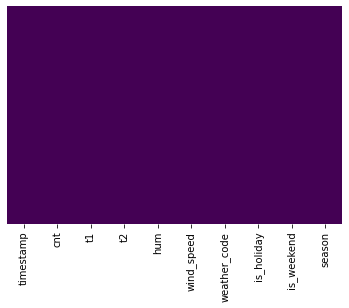

In [ ]:
sns.heatmap(bike.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Semua kolom pada dataset 'bike' tidak memiliki missing value.

## Mengecek Outlier

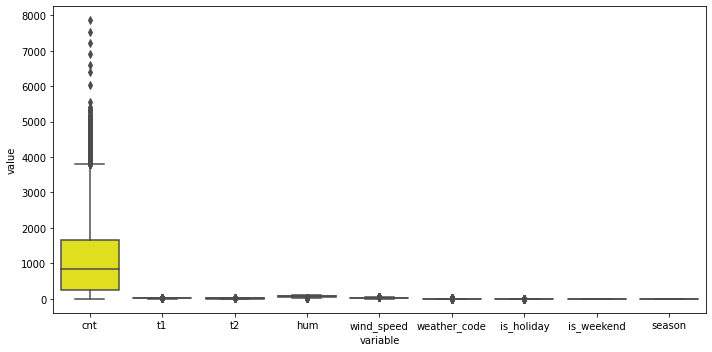

In [ ]:
bike1 = bike.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,5))
sns.boxplot(x="variable", y="value", color='yellow',orient='v', data=pd.melt(bike1))
plt.tight_layout()

Kolom numerik yang memiliki outlier adalah cnt, t1, t2, hum, wind_speed, weather_code, dan is_holiday.

## Melihat Korelasi data

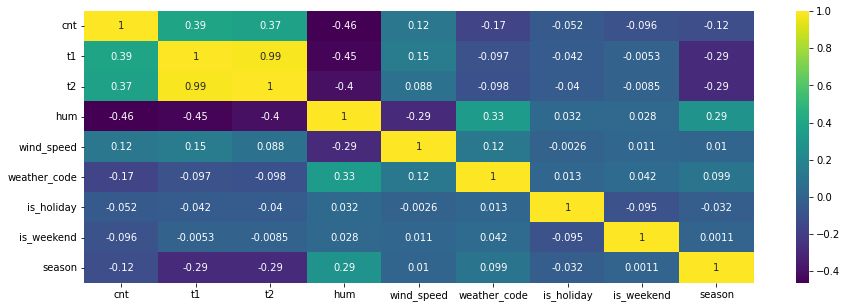

In [ ]:
a = len(bike1.columns)
kor = bike1.corr()
plt.figure(figsize=(15,5))
sns.heatmap(kor, annot=True, cmap = 'viridis')

## Melihat Statistik Data

In [ ]:
bike.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


## Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

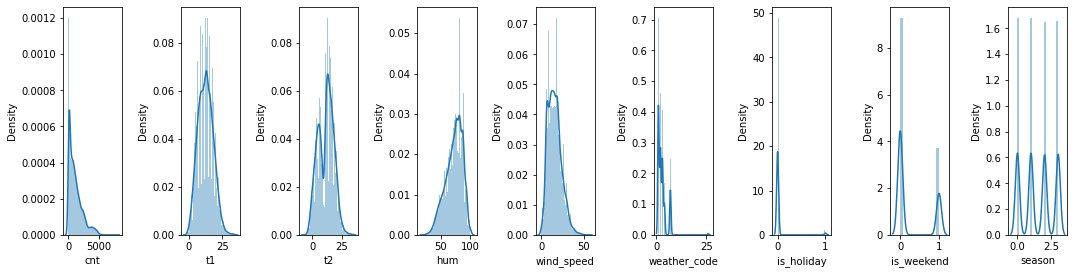

In [ ]:
l = bike1.columns.values
number_of_columns=len(bike1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplots_adjust(wspace=1)
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(bike[l[i]],kde=True) 

## Pairplot

Pairplot berisi grafik hubungan antar variabel.

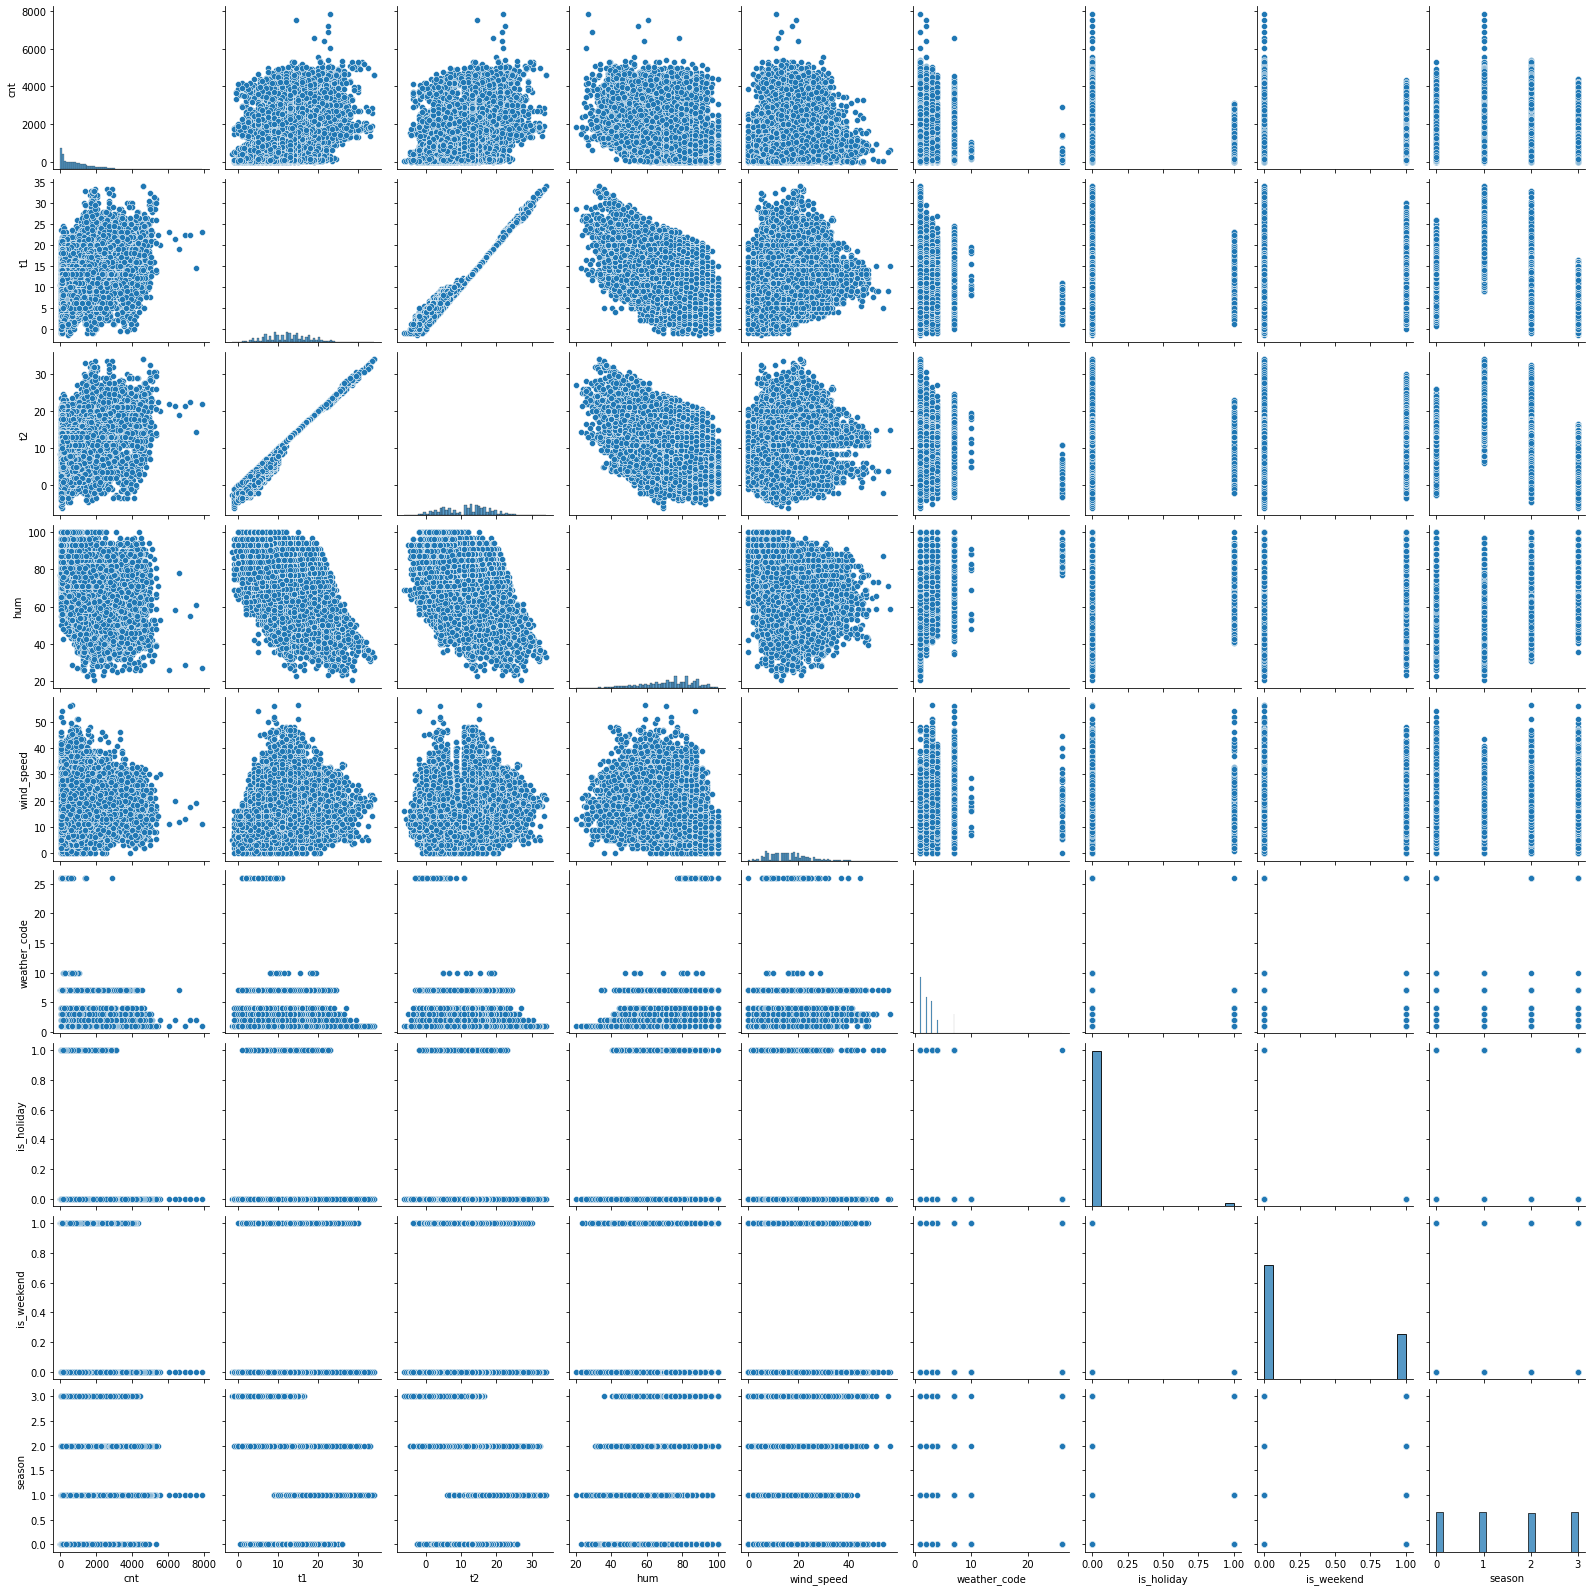

In [ ]:
sns.pairplot(bike1)

# Data Preparation

Setelah melakukan EDA diatas maka untuk hasil yang baik diperlukan beberapa langkah berikut:

1. Menghapus outlier
2. Menghapus kolom yang tidak diperlukan: **t1, t2, hum, wind_speed,** dan **is_holiday**
3. Mengubah tipe data kolom **timestamp** menjadi tipe data *datetime*
4. Menambah kolom 'hour' 


## Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.


In [ ]:
# menghitung skor IQR
sorted(bike1)

Q1=bike1.quantile(0.25)
Q3=bike1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

cnt             1414.75
t1                 8.00
t2                10.00
hum               20.00
wind_speed        10.50
weather_code       2.00
is_holiday         0.00
is_weekend         1.00
season             2.00
dtype: float64


In [ ]:
# menghapus outlier
bike1_clear = bike1[~((bike1 < (Q1 - 1.5 * IQR)) |(bike1 > (Q3 + 1.5 * IQR))).any(axis=1)]
bike1_clear

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


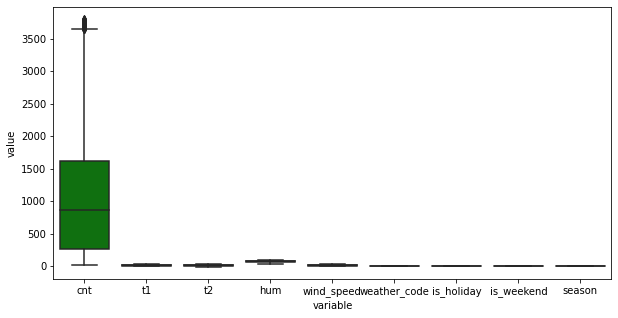

In [ ]:
# mengecek kembali outlier
plt.figure(figsize=(10,5))
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(bike1_clear))
plt.show()

Outlier berhasil dihapus.

## Seleksi Kolom

In [ ]:
bike=bike.drop(columns=['t1', 't2', 'hum', 'wind_speed', 'is_holiday'])
bike.head()

,timestamp,cnt,weather_code,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,1.0,3.0
1,2015-01-04 01:00:00,138,1.0,1.0,3.0
2,2015-01-04 02:00:00,134,1.0,1.0,3.0
3,2015-01-04 03:00:00,72,1.0,1.0,3.0
4,2015-01-04 04:00:00,47,1.0,1.0,3.0


## Mengubah Tipe Data

In [ ]:
# mengubah tipe data menjadi datetime
bike["timestamp"] = pd.to_datetime(bike["timestamp"])
bike.head()

,timestamp,cnt,weather_code,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,1.0,3.0
1,2015-01-04 01:00:00,138,1.0,1.0,3.0
2,2015-01-04 02:00:00,134,1.0,1.0,3.0
3,2015-01-04 03:00:00,72,1.0,1.0,3.0
4,2015-01-04 04:00:00,47,1.0,1.0,3.0


In [ ]:
# mengecek kembali tipe data variabel dataset
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
weather_code           float64
is_weekend             float64
season                 float64
dtype: object

Tipe data **timestamp** berubah menjadi tipe *datetime*.

## Menambah kolom

In [ ]:
# mengubah kolom 'timestamp' menjadi index
bike = bike.set_index("timestamp")

In [ ]:
# menambah kolom 'hour' pada dataset
bike["day_of_week"] = bike.index.weekday
bike["hour"] = bike.index.hour
bike.head()

,cnt,weather_code,is_weekend,season,day_of_week,hour
timestamp,,,,,,
2015-01-04 00:00:00,182,3.0,1.0,3.0,6,0
2015-01-04 01:00:00,138,1.0,1.0,3.0,6,1
2015-01-04 02:00:00,134,1.0,1.0,3.0,6,2
2015-01-04 03:00:00,72,1.0,1.0,3.0,6,3
2015-01-04 04:00:00,47,1.0,1.0,3.0,6,4


# Data Visualization

**Hubungan Hari Kerja dan Jumlah Sepeda yang disewa**

In [ ]:
# mengubah kategori variabel 'is_weekend'
bike['is_weekend']= bike['is_weekend'].replace({0: 'Weekday', 1: 'Weekend'})

# pengelompokkan berdasarkan hari kerja
weekday_bike = bike.groupby(['is_weekend']).sum()
weekday_bike

,cnt,weather_code,season,day_of_week,hour
is_weekend,,,,,
Weekday,15048216,33102.0,18558.0,24759,143173
Weekend,4857756,14312.0,7425.0,27355,57319


In [ ]:
# membuat grafik
fig = px.bar(weekday_bike, 
              x=weekday_bike.index, 
              y=weekday_bike["cnt"], 
              width = 500,
              height = 400)

fig.update_layout(
    title = 'Hubungan Hari Kerja dan Jumlah Sepeda yang disewa',
    title_font_color = 'white',
    title_font_size = 17,

    xaxis = dict(
        title = 'Hari kerja',
        titlefont_size = 12,
        tickfont_size = 11), 

    yaxis = dict(
        title = 'Jumlah Sepeda yang disewa',
        titlefont_size = 12,
        tickfont_size = 11))

fig.show()

**Insight** :

*   Jumlah sepeda yang disewa saat weekday mencapai lebih dari 15 juta sepeda.
*   Jumlah sepeda yang disewa saat weekend hanya sekitar 5 juta sepeda saja.
*   Sepeda lebih banyak disewa pada saat weekday dibandingkan dengan weekend.





**Hubungan Musim dengan dan Jumlah Sepeda yang disewa**

In [ ]:
# mengubah kategori variabel 'season'
bike['season'] = bike['season'].replace({0 : "Musim Semi ", 1 : "Musim Panas",  2: "Musim Gugur", 3 : "Musim Dingin"})

# pengelompokkan berdasarkan musim
season_bike = bike.groupby(['season']).sum()
season_bike

,cnt,weather_code,day_of_week,hour
season,,,,
Musim Dingin,3558087,13705.0,13022,49856
Musim Gugur,5073040,11848.0,12861,49536
Musim Panas,6424609,10449.0,13062,50510
Musim Semi,4850236,11412.0,13169,50590


In [ ]:
# membuat grafik
fig = px.bar(season_bike, 
              x=season_bike.index, 
              y=season_bike["cnt"],
              width=600,
              height=500, )

fig.update_layout(
    title = 'Hubungan Musim dan Jumlah Sepeda yang disewa',
    title_font_color = 'white',
    title_font_size = 21,

    xaxis = dict(
        title = 'Musim',
        titlefont_size = 12,
        tickfont_size = 11), 

    yaxis = dict(
        title = 'Jumlah Sepeda yang disewa (dalam juta)',
        titlefont_size = 12,
        tickfont_size = 11))

fig.show()

**Insight** :

*   Musim panas menempati posisi tertinggi jumlah sepeda yang disewa.
*   Musim dingin menempati posisi terendah jumlah sepeda yang disewa.
*   Jumlah sepeda yang disewa pada saat musim gugur dan musim semi hanya berbeda tipis yakni kurang dari 1 juta sepeda.  





**Hubungan Cuaca dan Jumlah Sepeda yang disewa**

In [ ]:
# mengubah kategori variabel 'weather_code'
bike['weather_code'] = bike['weather_code'].replace({
    1 : 'Sebagian cerah + sedikit kabut',
    2 : 'Sedikit berawan',
    3 : 'Awan pecah',
    4 : 'Berawan',
    7 : 'Hujan ringan/sedang',
   10 : 'Hujan badai + petir',
   26 : 'Hujan salju',
   94 : 'Kabut Tebal'})

# pengelompokkan berdasarkan cuaca
weather_bike = bike.groupby(['weather_code']).sum()
weather_bike

,cnt,day_of_week,hour
weather_code,,,
Awan pecah,4243887,10724,40386
Berawan,929978,4947,14487
Hujan badai + petir,8168,42,184
Hujan ringan/sedang,1526461,6289,24455
Hujan salju,15051,224,446
Sebagian cerah + sedikit kabut,7146847,18425,70686
Sedikit berawan,6035580,11463,49848


In [ ]:
# membuat grafik
fig = px.bar(weather_bike, 
              x=weather_bike.index, 
              y=weather_bike["cnt"],
              width=600,
              height=600)

fig.update_layout(
    title = 'Hubungan Cuaca dan Jumlah Sepeda yang disewa',
    title_font_color = 'white',
    title_font_size = 21,

    xaxis = dict(
        title = 'Cuaca',
        titlefont_size = 13,
        tickfont_size = 11), 

    yaxis = dict(
        title = 'Jumlah Sepeda yang disewa (dalam juta)',
        titlefont_size = 13,
        tickfont_size = 11))

fig.show()

**Insight** :

*  Jumlah sepeda yang disewa terbanyak saat cuaca sebagian cerah + sedikit kabut yaitu 7.146.847 sepeda.
*  Jumlah sepeda yang disewa mengalami penurunan drastis saat cuaca hujan badai dan hujan salju.



**Hubungan Jam dan Jumlah Sepeda yang disewa**

In [ ]:
# pengelompokkan berdasarkan jam
hour_bike = bike.groupby(['hour']).sum()
hour_bike

,cnt,day_of_week
hour,,
0,210401,2165
1,145257,2165
2,98275,2153
3,67951,2155
4,52859,2155
5,79820,2155
6,338771,2172
7,1066309,2168
8,2087164,2160


In [ ]:
# membuat grafik
fig = px.bar(hour_bike, 
              x=hour_bike.index, 
              y=hour_bike["cnt"],
              width=600,
              height=500)

fig.update_layout(
    title = 'Hubungan Jam dan Jumlah Sepeda yang disewa',
    title_font_color = 'white',
    title_font_size = 22,

    xaxis = dict(
        title = 'Jam',
        titlefont_size = 12,
        tickfont_size = 11), 

    yaxis = dict(
        title = 'Jumlah Sepeda yang disewa (dalam juta)',
        titlefont_size = 12,
        tickfont_size = 11))

fig.show()

**Insight** :

*  Jumlah sepeda mulai banyak disewa pada saat jam kerja yakni rentang waktu 04:00 - 18:00.
*  Penurunan jumlah sepeda yang signifikan terjadi pada rentang waktu 17:00 - 04:00.
*  Jumlah sepeda yang disewa mengalami peningkatan tertinggi pada saat jam 08:00.
*  Jumlah sepeda yang disewa mengalami penurunan terendah pada saat jam 04:00.




**Hubungan Hari dan Jumlah Sepeda yang disewa**

In [ ]:
# pengelompokkan berdasarkan
days_bike = bike.groupby("day_of_week").sum()

# membuat variabel 'days'
days_bike["days"] = ["Senin", "Selasa", "Rabu", "Kamis","Jumat", "Sabtu", "Minggu"]

# mengubah variabel 'days' menjadi index
days_bike = days_bike.set_index("days")
days_bike

,cnt,hour
days,,
Senin,2834719,28876
Selasa,3081414,28738
Rabu,3097334,28670
Kamis,3136956,28638
Jumat,2897793,28251
Sabtu,2454040,28465
Minggu,2403716,28854


In [ ]:
# membuat grafik
fig = px.bar(x=days_bike.index, 
             y=days_bike["cnt"],
             width=600,
             height=500)

fig.update_layout(
    title = 'Hubungan Hari dan Jumlah Sepeda yang disewa',
    title_font_color = 'white',
    title_font_size = 22,

    xaxis = dict(
        title = 'Hari',
        titlefont_size = 12,
        tickfont_size = 11), 

    yaxis = dict(
        title = 'Jumlah Sepeda yang disewa (dalam juta)',
        titlefont_size = 12,
        tickfont_size = 11))

**Insight** :

*   Jumlah sepeda yang disewa tertinggi pada hari Kamis.
*   Jumlah sepeda yang disewa terendah pada hari Minggu.





# Kesimpulan
Menyediakan banyak sepeda di hari Kamis, khususnya pada musim panas saat kondisi sebagian cerah dan sedikit berkabut mulai pukul 05:00 - 17:00 untuk mendapatkan maksimal profit karena pada waktu tersebut jumlah sepeda paling banyak disewa.